In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

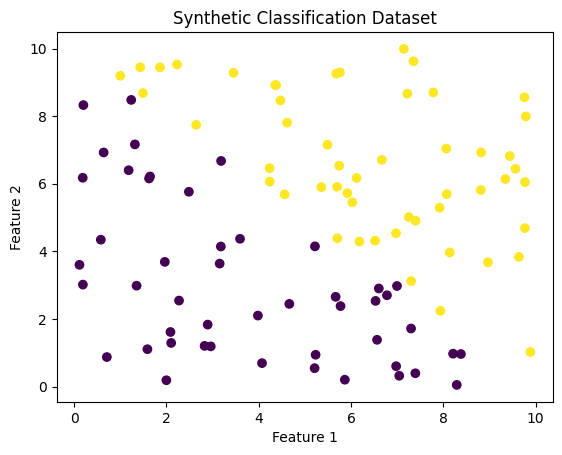

In [2]:
# Generating synthetic data for classification
np.random.seed(0)
X = np.random.rand(100, 2) * 10  # 100 samples, 2 features
y = (X[:, 0] + X[:, 1] > 10).astype(int)

# # Example of adding noise to the data (uncomment these lines to get a noisy data)
# noise = np.random.normal(0, 0.5, size=X.shape)  # Adjust the standard deviation for noise level
# X = X + noise

# Visualizing the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Classification Dataset')
plt.show()




In [3]:
# Implimenting logistic regression
class LogisticRegression:
  def __init__(self, lr=0.001, n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.ones(n_features)
    self.bias = 1

    for _ in range(self.n_iters):
      linear_model = np.dot(X, self.weights) + self.bias # Linear Function
      y_predicted = self.sigmoid(linear_model) # Calling Sigmoid Activation Function

      # Calculating Gradient Descent and Updating Weights and Bias
      self.weights = self.weights - self.lr*((1 / n_samples) * np.dot(X.T, (y_predicted - y)))
      self.bias = self.bias - self.lr*((1 / n_samples) * np.sum(y_predicted - y))

  def predict(self, X, threshold = 0.5): # Predict function with default threshold = 0.5
    y_predicted = self.predict_proba(X)
    y_predicted = np.array([1 if i >= threshold else 0 for i in y_predicted])
    return y_predicted

  def predict_proba(self, X): # Predict Probability
    y_predicted = np.dot(X, self.weights) + self.bias
    y_predicted = self.sigmoid(y_predicted)
    return y_predicted

  def get_coeffs(self):
    return self.weights , self.bias

  def sigmoid(self, x): # Defined Sigmoid Activation Function
    y = 1/ (1 + 1/np.exp(x))
    return y

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42) # Splitting data into 60% training data and 40% test data

model = LogisticRegression(lr=0.01, n_iters=10000)
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred_prob = model.predict_proba(X_test)

In [12]:
pred, pred_prob

(array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1]),
 array([0.04473631, 0.76261785, 0.77524315, 0.62264136, 0.97113283,
        0.03439209, 0.89973676, 0.70400582, 0.9896938 , 0.87333227,
        0.82734858, 0.01712066, 0.76229155, 0.27643774, 0.3658597 ,
        0.84134341, 0.35415992, 0.68845674, 0.34353966, 0.18639989,
        0.91166564, 0.91686413, 0.46877445, 0.26114467, 0.62211344,
        0.72457786, 0.22757575, 0.8515863 , 0.98343414, 0.95646074,
        0.876038  , 0.05072591, 0.0634017 , 0.33027716, 0.73424334,
        0.86189491, 0.05283708, 0.57856336, 0.90959086, 0.61981601]))

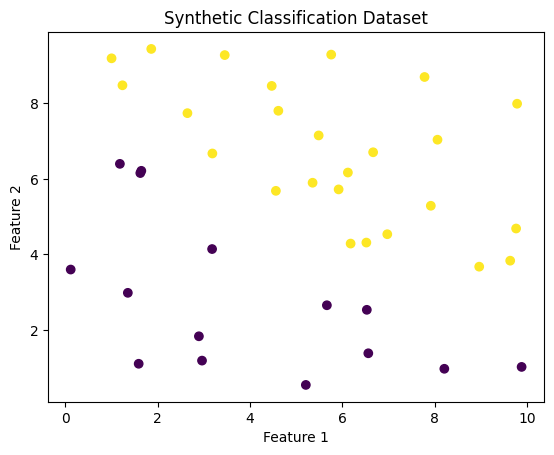

In [7]:
# Visualizing Predicted Data

plt.scatter(X_test[:, 0], X_test[:, 1], c=pred, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Classification Dataset')
plt.show()

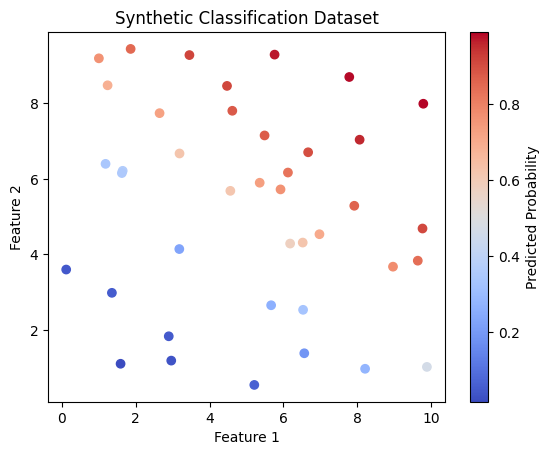

In [21]:
# Visualizing Predicted Probability

plt.scatter(X_test[:, 0], X_test[:, 1], c=pred_prob, cmap='coolwarm')
plt.colorbar().set_label('Predicted Probability')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Classification Dataset')
plt.show()

In [8]:
w, b = model.get_coeffs()
wx = w[0]
wy = w[1]

m = -1*wx/wy # Calculating Slope of the decision boundary line
c = -1*b/wy # Calculating Intercept of the decision boundary line

x = np.array([0,10])
Y = m*x + c # Equation of line (decision boundary)

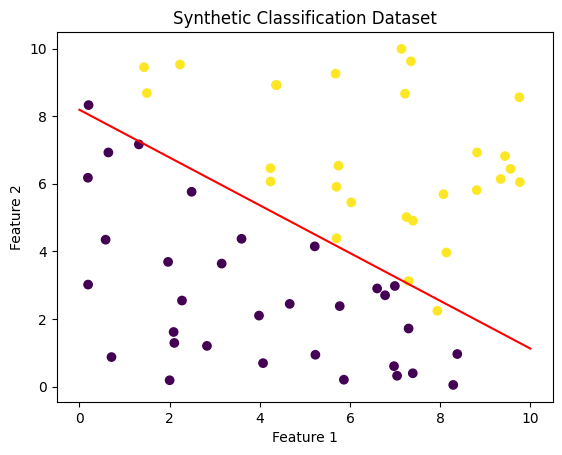

In [25]:
# Visualizing decision boundary on training data

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.plot(x, Y, color='red') # Decision boundary
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Classification Dataset')
plt.show()

In [10]:
accuracy_score(y_test, pred)*100 # Evaluating accuracy of the model in %

92.5